In [ ]:
import pandas as pd

df = pd.read_csv('df_gpt4.csv')

df = df.dropna(subset=['cleaned text'])

df

,Institution name,Main panel_x,Unit of assessment number_x,Unit of assessment name,Title,Summary impact type,Countries,Formal partners,Funding programmes,Global research identifiers,...,1. Summary of the impact,2. Underpinning research,3. References to the research,4. Details of the impact,5. Sources to corroborate the impact,Weighted Avg,Variance,5 Class Labels,9 Class Labels,cleaned text
0,University of East London,C,21.0,Sociology,"?Go Home?; Shaping the practice, policy and un...",Societal,[Italy];[Sweden];[Netherlands ];[Ireland];[Uni...,[University of Eastern Finland];[Middle East T...,[European Commission under the 7th Framework P...,NaN,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,2.667,0.556111,3,5,"Since 2013, CMRB findings have been used to su..."
1,University of Lincoln,A,6.0,"Agriculture, Food and Veterinary Sciences",Agricultural Robotics: Data Driven Technologie...,Technological,[England];[Norway];[USA],[SAGA Robotics];[Garford Farms Limited];[Berry...,[N/A],[grid.423443.6];[grid.418100.c],...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,3.000,0.666000,3,6,UoL’s innovative agri-food research has underp...
2,University of Cambridge,A,4.0,"Psychology, Psychiatry and Neuroscience",Alleviating the societal and economic burden o...,Health,[England];[China];[USA];[Canada];[Belgium];[Fr...,NaN,NaN,[grid.14105.31];[grid.473755.7];[grid.52788.30],...,**1. Summary of the impact** \(indicative maxi...,**2. Underpinning research \(indicative maximu...,**3. References to the research** \(indicative...,**4. Details of the impact** \(indicative maxi...,**5. Sources to corroborate the impact** \(ind...,3.667,0.444111,4,7,The Cambridge University research has had a si...
3,University of Cambridge,A,6.0,"Agriculture, Food and Veterinary Sciences",Changes in policy for the control of bovine tu...,Environmental,[England];[Wales];[Ethiopia],NaN,NaN,[grid.418100.c];[grid.434257.3];[grid.433527.4...,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,3.500,0.450000,4,7,Bovine tuberculosis is a substantial economic ...
4,University of Derby,C,20.0,Social Work and Social Policy,Changing Police and Investigative Practice thr...,Legal,NaN,NaN,NaN,NaN,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,2.333,1.554111,2,5,The impact of Bull's work is on: (1) internati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,School of Oriental and African Studies,C,22.0,Anthropology and Development Studies,Transforming Working Practices in the House of...,Societal,"[UK, Europe, Asia, Africa]",[Hansard Society];[Leeds University];[Jawaharl...,[ERC-2018-ADG - ERC Advanced Grant];[Research ...,[grid.452896.4];[grid.452966.a];[grid.426413.6...,...,**1. Summary of the impact** \(indicative maxi...,**2. Underpinning research** \(indicative maxi...,**3. References to the research** \(indicative...,**4. Details of the impact** \(indicative maxi...,**5. Sources to corroborate the impact** \(ind...,3.750,0.187500,4,8,"Many scholars, MPs, civil servants and Commons..."
6300,Nottingham Trent University,A,3.0,"Allied Health Professions, Dentistry, Nursing ...",Translating biomedical nanotechnology into com...,Technological,"[Algeria,

In [ ]:
import pandas as pd
import tensorflow
from nltk.tokenize import regexp_tokenize, sent_tokenize
from nltk import pos_tag_sents
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import re
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


import pandas as pd
import numpy as np
import random
import tensorflow as tf
import torch

# Set the seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


#Dictionary of contractions for replacement

contractions = {
          "ain't": "am not",
          "aren't": "are not",
          "can't": "cannot",
          "can't've": "cannot have",
          "'cause": "because",
          "could've": "could have",
          "couldn't": "could not",
          "couldn't've": "could not have",
          "didn't": "did not",
          "doesn't": "does not",
          "don't": "do not",
          "hadn't": "had not",
          "hadn't've": "had not have",
          "hasn't": "has not",
          "haven't": "have not",
          "he'd": "he would",
          "he'd've": "he would have",
          "he'll": "he will",
          "he'll've": "he will have",
          "he's": "he is",
          "how'd": "how did",
          "how'd'y": "how do you",
          "how'll": "how will",
          "how's": "how is",
          "i'd": "i would",
          "i'd've": "i would have",
          "i'll": "i will",
          "i'll've": "i will have",
          "i'm": "i am",
          "i've": "i have",
          "isn't": "is not",
          "it'd": "it had",
          "it'd've": "it would have",
          "it'll": "it will",
          "it'll've": "it will have",
          "it's": "it is",
          "let's": "let us",
          "ma'am": "madam",
          "mayn't": "may not",
          "might've": "might have",
          "mightn't": "might not",
          "mightn't've": "might not have",
          "must've": "must have",
          "mustn't": "must not",
          "mustn't've": "must not have",
          "needn't": "need not",
          "needn't've": "need not have",
          "o'clock": "of the clock",
          "oughtn't": "ought not",
          "oughtn't've": "ought not have",
          "shan't": "shall not",
          "sha'n't": "shall not",
          "shan't've": "shall not have",
          "she'd": "she would",
          "she'd've": "she would have",
          "she'll": "she will",
          "she'll've": "she will have",
          "she's": "she is",
          "should've": "should have",
          "shouldn't": "should not",
          "shouldn't've": "should not have",
          "so've": "so have",
          "so's": "so is",
          "that'd": "that would",
          "that'd've": "that would have",
          "that's": "that is",
          "there'd": "there had",
          "there'd've": "there would have",
          "there's": "there is",
          "they'd": "they would",
          "they'd've": "they would have",
          "they'll": "they will",
          "they'll've": "they will have",
          "they're": "they are",
          "they've": "they have",
          "to've": "to have",
          "wasn't": "was not",
          "we'd": "we had",
          "we'd've": "we would have",
          "we'll": "we will",
          "we'll've": "we will have",
          "we're": "we are",
          "we've": "we have",
          "weren't": "were not",
          "what'll": "what will",
          "what'll've": "what will have",
          "what're": "what are",
          "what's": "what is",
          "what've": "what have",
          "when's": "when is",
          "when've": "when have",
          "where'd": "where did",
          "where's": "where is",
          "where've": "where have",
          "who'll": "who will",
          "who'll've": "who will have",
          "who's": "who is",
          "who've": "who have",
          "why's": "why is",
          "why've": "why have",
          "will've": "will have",
          "won't": "will not",
          "won't've": "will not have",
          "would've": "would have",
          "wouldn't": "would not",
          "wouldn't've": "would not have",
          "y'all": "you all",
          "y'alls": "you alls",
          "y'all'd": "you all would",
          "y'all'd've": "you all would have",
          "y'all're": "you all are",
          "y'all've": "you all have",
          "you'd": "you had",
          "you'd've": "you would have",
          "you'll": "you you will",
          "you'll've": "you you will have",
          "you're": "you are",
          "you've": "you have"
            }

In [ ]:

import string

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)


def penn_to_wordnet(penn_pos_tag):
    """
    Function to convert Penn Treebank part-of-speech tags to corresponding WordNet tags.
    """
    tag_dictionary = {
        'NN': 'n', 'NNS': 'n', 'NNP': 'n', 'NNPS': 'n',
        'JJ': 'a', 'JJR': 'a', 'JJS': 'a',
        'VB': 'v', 'VBD': 'v', 'VBG': 'v', 'VBN': 'v', 'VBP': 'v', 'VBZ': 'v',
        'RB': 'r', 'RBR': 'r', 'RBS': 'r',
        'MD': 'v'
    }

    # Return the WordNet tag for given Penn Treebank tag, return "n" if none found
    return tag_dictionary.get(penn_pos_tag[:2], "n")

def preprocess_text(text):
    """
    Function to preprocess text: lowercasing, removing punctuation, expanding contractions, lemmatization, etc.
    """
    # Account for edge case when text is empty
    if not isinstance(text, str):
        return ""

    # Convert all text to lowercase
    text = text.lower()

    # Remove characters that are repeated more than twice in a row
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Replace URLs with space
    text = re.sub(r"http\S+", " ", text)

    # Remove HTML tags from text
    text = re.sub("<.*?>", "", text)

    # Ensure that there is space after each period
    text = re.sub(r'\.(?![ .])', '. ', text)

    # Replace line break tags with space
    text = re.sub(r'<br />', ' ', text)

    # Remove words containing digits
    text = re.sub(r'\d+', '', text)

    # Remove all numbers
    text = re.sub(r'\b(?=.*\d)(?=.*[a-zA-Z]).*?\b', '', text)

    # Remove all numbers including floating points
    text = re.sub(r'\b\d+(\.\d+)?', '', text)

    # Tokenize sentences and words
    tokenized_sentences = [regexp_tokenize(sent, pattern="\s+", gaps=True) for sent in sent_tokenize(text)]

    new_sentences = []

    # Use tqdm to visualize the progress of processing sentences
    for sentences in pos_tag_sents(tokenized_sentences):
        new_sentence = []
        # Iterate through word/tag pair
        for word, tag in sentences:
            # Check if word in punctuation and stopwords list
            if word not in punctuation_set and word not in stopwords_set:
                # Expand contractions if present
                if word in contractions:
                    words = contractions[word].split(" ")
                    new_sentence.extend(words)
                else:
                    # Get WordNet Pos Tag and lemmatize word
                    wordnet_pos = penn_to_wordnet(tag)
                    lemmatized_word = wnl.lemmatize(word, pos=wordnet_pos)
                    # Remove non-alphanumeric characters
                    lemmatized_word = re.sub(r'[^\w\s]', '', lemmatized_word)

                    # Check if lemmatized word exists and has length greater than 2
                    if lemmatized_word and len(lemmatized_word) > 2:
                        new_sentence.append(lemmatized_word)

        if new_sentence:
            new_sentences.append(new_sentence)

    return new_sentences


In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()


new_df = df[["Main panel_x","Unit of assessment number_x","Title","cleaned text","5 Class Labels","Summary impact type","9 Class Labels", "Variance", "Weighted Avg"]]

new_df = new_df[new_df["Main panel_x"] == "A"]


#new_df["sentence tokenized"] = new_df["cleaned text"].apply(lambda x: preprocess_text(x))


In [ ]:
new_df


,Main panel_x,Unit of assessment number_x,Title,cleaned text,5 Class Labels,Summary impact type,9 Class Labels,Variance,Weighted Avg
1,A,6.0,Agricultural Robotics: Data Driven Technologie...,UoL’s innovative agri-food research has underp...,3,Technological,6,0.666000,3.000
2,A,4.0,Alleviating the societal and economic burden o...,The Cambridge University research has had a si...,4,Health,7,0.444111,3.667
3,A,6.0,Changes in policy for the control of bovine tu...,Bovine tuberculosis is a substantial economic ...,4,Environmental,7,0.450000,3.500
7,A,2.0,Empowering personalised discussion and advance...,Advance decisions about resuscitation are a gl...,4,Health,7,0.358124,3.626
17,A,5.0,Improving patient outcomes and treatment guide...,Professor Irving's research has been instrumen...,3,Health,6,0.454204,3.214
...,...,...,...,...,...,...,...,...,...
6262,A,4.0,Transforming the use of Arterial Spin Labellin...,The Arterial Spin Labelling In Dementia (AID) ...,4,Technological,7,0.655264,3.644
6271,A,5.0,Transforming therapeutic outcomes of fatal Duc...,Research undertaken at RHUL led to the develop...,3,Health,7,0.222111,3.333
6275,A,3.0,Transforming Treatment for Obstructive Sleep A...,Obstructive sleep apnoea (OSA) is one of the m...,3,Health,7,0.234375,3.375
6289,A,1.0,Transforming vaccine policy for pneumococcal d...,It was the result of Professor Lim's expertise...,3,Health,7,0.334111,3.333


In [ ]:
def flatten(sents_tokenized):
    return [word for sentence in sents_tokenized for word in sentence]

def tokens_to_string(tokens):
    return ' '.join(tokens)


new_df["word tokenized"] = new_df["sentence tokenized"].apply(lambda x: flatten(x))

new_df["string"] = new_df["word tokenized"].apply(lambda x: tokens_to_string(x))





In [ ]:

def map_labels(label):
    if label in [0, 1, 2, 3, 4, 5]:
        return 0
    elif label in [6, 7]:
        return 1
    elif label == 8:
        return 2
    else:
        return label

new_df['3 Class Labels'] = new_df['9 Class Labels'].apply(map_labels)


In [ ]:
def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = 'max_length', truncation=True)


labels = new_df["3 Class Labels"]
texts = new_df["cleaned text"]

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=42  # 50% training, 50% temporary
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42  # 60% validation, 40% test
)

train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

train_df

,text,label
93,The research of Wormstone and team in developi...,1
2617,Driving conservation efforts through establish...,1
874,Bariatric surgery is a widely used interventio...,0
2747,Perinatal depression can have devastating cons...,2
5719,Professor Stallard's research has improved the...,1
...,...,...
4785,Estimates of the burden of viral hepatitis wer...,1
5026,The landscape of the emergency care workforce ...,1
6027,Details of the impact. New diagnostic testing ...,1
3891,Details of the impact\n\nHaving identified a c...,1


In [ ]:
from sklearn.utils import shuffle
import nlpaug.augmenter.word as naw
import numpy as np
import pandas as pd
from tqdm import tqdm

#script to perform data augmentation using BERT-base to generate
#new synthetic samples

def augment_text(df, samples, class_id):
    contextual_aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action='substitute', device='cuda')

    np.random.seed(42)

    new_texts = []

    df_minority = df[df["label"] == class_id].reset_index(drop=True)

    for i in tqdm(np.random.randint(0, len(df_minority), samples)):
        text = df_minority.iloc[i]['text']
        augmented_text = contextual_aug.augment(text)
        new_texts.append(augmented_text[0])

    new_df = pd.DataFrame({'text': new_texts, 'label': class_id})

    seed = 42
    df = shuffle(pd.concat([df, new_df]).reset_index(drop=True), random_state=seed)

    return df

augmented_df = augment_text(train_df, 200, 0)
augmented_df = augment_text(augmented_df, 250, 2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 250/250 [00:50<00:00,  4.96it/s]


In [ ]:
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_pandas(augmented_df)
test_dataset = Dataset.from_pandas(test_df)
val_dataset =  Dataset.from_pandas(val_df)


dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'validation': val_dataset
})

print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 1395
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 203
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 202
    })
})


In [ ]:
import pandas as pd
import datasets
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import os
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import LongformerTokenizerFast, LongformerForSequenceClassification, Trainer, TrainingArguments

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096',
                                                           num_labels = 3,
                                                           gradient_checkpointing=False,
                                                           attention_window = 1024)
# Load the tokenizer
tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096', max_length = 2048)


Using device: cuda


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = 'max_length', truncation=True, max_length = 4096)

text_encoded = dataset_dict.map(tokenization, batched = False)

text_encoded

Map:   0%|          | 0/1395 [00:00<?, ? examples/s]

Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/202 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1395
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 203
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 202
    })
})

In [ ]:

text_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
#run on specific parameters

import numpy as np
import torch
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import Trainer, TrainingArguments, LongformerForSequenceClassification

# Define a function to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    # Calculate precision, recall, f1 using macro average
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='macro', zero_division=0
    )


    # Calculate accuracy
    acc = accuracy_score(labels, preds)

    # Return metrics as a dictionary
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define the hyperparameters in a single parameter dictionary
hyperparameters = {
    "per_gpu_batch_size": 4,
    "learning_rate": 3e-5,
    "num_epochs": 6,
    "weight_decay": 0.1,
    "warmup_steps": 0
}


# Define the training arguments
training_args = TrainingArguments(
    output_dir='./temp_results',
    num_train_epochs=hyperparameters["num_epochs"],
    per_device_train_batch_size=hyperparameters["per_gpu_batch_size"],
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Save model at the end of each epoch
    fp16=True,
    gradient_accumulation_steps=4,
    save_total_limit=2,  # Keep only the last 2 models to save disk space
    load_best_model_at_end=False,
    learning_rate=hyperparameters["learning_rate"],
    weight_decay=hyperparameters["weight_decay"],
    logging_dir='./temp_logs',
    logging_steps=10,
    report_to="none",
    warmup_steps=hyperparameters["warmup_steps"]
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=text_encoded['train'],  # Assuming text_encoded is predefined
    eval_dataset=text_encoded['validation'],
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Output evaluation results
print(f"Evaluation results: {eval_result}")

# Save the trained model
#trainer.save_model('./longformer_model')

# Save the tokenizer
#tokenizer.save_pretrained('./longformer_model')


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.401000,1.203508,0.663366,0.512551,0.689204,0.496844
1,0.204300,1.284676,0.668317,0.544404,0.649981,0.512936
2,0.158600,1.931347,0.693069,0.583862,0.682460,0.554893
4,0.073100,2.074229,0.702970,0.600018,0.703465,0.570936


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.401000,1.203508,0.663366,0.512551,0.689204,0.496844
1,0.204300,1.284676,0.668317,0.544404,0.649981,0.512936
2,0.158600,1.931347,0.693069,0.583862,0.682460,0.554893
4,0.025800,2.307140,0.678218,0.564822,0.694368,0.550696


Evaluation results: {'eval_loss': 2.3071398735046387, 'eval_accuracy': 0.6782178217821783, 'eval_f1': 0.5648216786096697, 'eval_precision': 0.6943681390967552, 'eval_recall': 0.550695573622403, 'eval_runtime': 18.0197, 'eval_samples_per_second': 11.21, 'eval_steps_per_second': 1.443, 'epoch': 4.98567335243553}


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Make Predictions on the Testing Set
predictions = trainer.predict(text_encoded['test'])

# Step 2: Extract Predicted Labels and True Labels
preds = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Step 3: Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, preds)

# Compute Classification Report
class_report = classification_report(true_labels, preds, zero_division=0)

# Output confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Output classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 11   6   1]
 [ 13 119   9]
 [  0  36   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.61      0.52        18
           1       0.74      0.84      0.79       141
           2       0.44      0.18      0.26        44

    accuracy                           0.68       203
   macro avg       0.55      0.55      0.52       203
weighted avg       0.65      0.68      0.65       203



Confusion Matrix:
[[  6  11   1]
 [ 14 117  10]
 [  2  35   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.33      0.30        18
           1       0.72      0.83      0.77       141
           2       0.39      0.16      0.23        44

    accuracy                           0.64       203
   macro avg       0.46      0.44      0.43       203
weighted avg       0.61      0.64      0.61       203



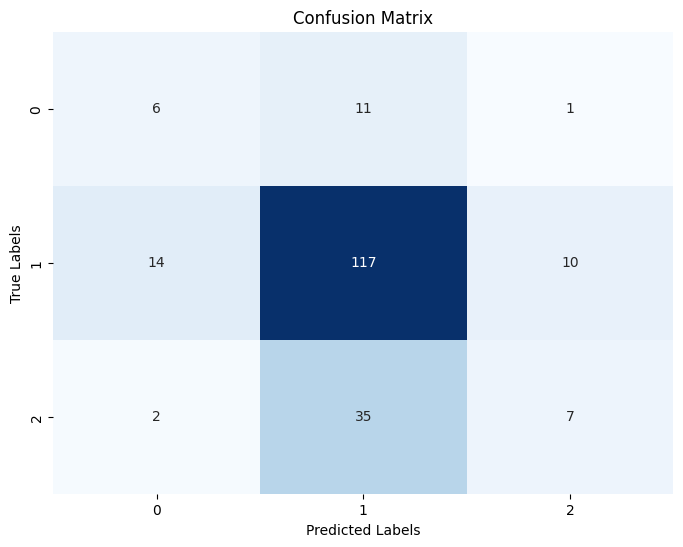

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_labels, preds)

# Compute Classification Report
class_report = classification_report(true_labels, preds, zero_division=0)

# Output confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Output classification report
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import torch
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import Trainer, TrainingArguments, LongformerForSequenceClassification
import optuna
from transformers import EarlyStoppingCallback

shuffled_dataset = text_encoded.shuffle(seed=42)

# Define a function to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    # Calculate precision, recall, f1 using macro average
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='macro', zero_division=0
    )

    # Calculate accuracy
    acc = accuracy_score(labels, preds)

    # Return metrics as a dictionary
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Global variable to track the best F1 score
best_f1_macro = 0
best_model_path = './best_model'

# Objective function for Optuna
def objective(trial):

    global best_f1_macro

    model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=3)

    per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4)
    learning_rate = trial.suggest_categorical('learning_rate', [2e-5, 3e-5, 5e-5])
    num_epochs = trial.suggest_categorical('num_epochs', [2, 3, 4])
    weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
    warmup_steps = trial.suggest_int('warmup_steps', 0, 500)

    training_args = TrainingArguments(
    output_dir='./temp_results',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=per_gpu_batch_size,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    greater_is_better=True,
    fp16=True,
    gradient_accumulation_steps=4,
    save_total_limit=2,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    logging_dir='./temp_logs',
    logging_steps=10,
    report_to="none",
    warmup_steps=warmup_steps
)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=text_encoded['train'],  # Assuming text_encoded is predefined
        eval_dataset=text_encoded['validation'],
        compute_metrics=compute_metrics,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate()

    # Calculate F1 macro score
    f1_macro = eval_result['eval_f1']

    # Check if the current model is the best one
    if f1_macro > best_f1_macro:
        print(f"New best model found with F1 macro: {f1_macro}. Saving model...")
        best_f1_macro = f1_macro
        # Save the best model to the specified directory
        trainer.save_model(best_model_path)

    # Return the F1 macro score for Optuna to optimize
    return f1_macro

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Increase the number of trials for a more thorough search

print("Best hyperparameters found: ", study.best_params)

print("Best trial's F1 macro score: ", study.best_value)



[I 2024-09-11 12:26:57,520] A new study created in memory with name: no-name-51d41079-8420-4268-b62f-dd8b9b2b9589
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.802000,0.908346,0.608911,0.252308,0.202970,0.333333
2,0.407200,0.795858,0.653465,0.524200,0.636381,0.508973


New best model found with F1 macro: 0.5242003367003367. Saving model...


[I 2024-09-11 12:41:44,695] Trial 0 finished with value: 0.5242003367003367 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 3, 'weight_decay': 0.07664223748232964, 'warmup_steps': 300}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.715600,0.862295,0.608911,0.252308,0.202970,0.333333
1,0.596300,0.895451,0.584158,0.400213,0.483389,0.396905


[I 2024-09-11 12:51:40,354] Trial 1 finished with value: 0.40021348514499194 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.47826387158300093, 'warmup_steps': 76}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.848700,0.925319,0.608911,0.252308,0.202970,0.333333
1,0.773200,0.830791,0.559406,0.375125,0.324613,0.444336
2,0.626500,0.907999,0.554455,0.484674,0.540213,0.484998
3,0.266500,0.959998,0.648515,0.476275,0.662975,0.460542


[I 2024-09-11 13:10:01,609] Trial 2 finished with value: 0.4762751612272816 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.593893305589806, 'warmup_steps': 380}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.949700,0.947597,0.608911,0.252308,0.202970,0.333333
1,0.678700,0.784018,0.574257,0.516769,0.514270,0.539741


[I 2024-09-11 13:19:02,655] Trial 3 finished with value: 0.5167687372411782 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.0757600182749492, 'warmup_steps': 225}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.819400,0.916523,0.608911,0.252308,0.202970,0.333333
2,0.583200,0.804981,0.608911,0.428967,0.542146,0.424776


[I 2024-09-11 13:33:47,197] Trial 4 finished with value: 0.4289674956341623 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 3, 'weight_decay': 0.2933981445608676, 'warmup_steps': 491}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.774800,0.891663,0.608911,0.252308,0.202970,0.333333
2,0.468000,0.881744,0.613861,0.461114,0.552847,0.448497
3,0.164900,1.015332,0.623762,0.485362,0.573791,0.475164


[I 2024-09-11 13:53:18,286] Trial 5 finished with value: 0.48536187509586676 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 4, 'weight_decay': 0.3789154326884965, 'warmup_steps': 152}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.919100,0.947315,0.608911,0.252308,0.202970,0.333333
1,0.692300,0.785383,0.613861,0.392256,0.563689,0.403011
2,0.487900,0.794423,0.594059,0.355700,0.340859,0.399566


[I 2024-09-11 14:07:06,024] Trial 6 finished with value: 0.3556998556998557 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 2e-05, 'num_epochs': 3, 'weight_decay': 0.42937506934950304, 'warmup_steps': 277}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.734800,0.877687,0.608911,0.252308,0.202970,0.333333
2,0.375900,1.096132,0.613861,0.437705,0.558009,0.441807
3,0.118600,1.283635,0.599010,0.464890,0.523470,0.450756


[I 2024-09-11 14:26:39,398] Trial 7 finished with value: 0.46489020050342855 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 4, 'weight_decay': 0.4783811367818538, 'warmup_steps': 85}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.990100,0.909095,0.608911,0.252308,0.202970,0.333333
1,0.865300,0.910558,0.608911,0.252308,0.202970,0.333333
2,0.614000,0.801036,0.613861,0.372807,0.385836,0.410407
3,0.362700,0.809293,0.633663,0.431086,0.668558,0.438561


[I 2024-09-11 14:45:00,040] Trial 8 finished with value: 0.4310858846462562 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 2e-05, 'num_epochs': 4, 'weight_decay': 0.375058254767055, 'warmup_steps': 390}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.808600,0.967220,0.608911,0.252308,0.202970,0.333333
2,0.582300,0.809436,0.599010,0.396542,0.524511,0.408967
3,0.239400,0.843524,0.633663,0.493983,0.571876,0.472954


[I 2024-09-11 15:04:32,629] Trial 9 finished with value: 0.49398318491263615 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.3137435515084968, 'warmup_steps': 70}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,1.040700,0.921773,0.608911,0.252308,0.202970,0.333333
1,0.763900,0.855794,0.599010,0.249742,0.201667,0.327913
2,0.650700,0.810326,0.599010,0.331944,0.357071,0.362541


[I 2024-09-11 15:18:01,963] Trial 10 finished with value: 0.3319437206878583 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 2e-05, 'num_epochs': 3, 'weight_decay': 0.004987348960581062, 'warmup_steps': 302}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.931900,0.933264,0.603960,0.251029,0.202322,0.330623
1,0.674600,0.874296,0.623762,0.343056,0.473096,0.383957


[I 2024-09-11 15:27:00,563] Trial 11 finished with value: 0.3430555555555555 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.048536723465837185, 'warmup_steps': 187}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.910100,0.922739,0.608911,0.252308,0.202970,0.333333
1,0.669700,0.769136,0.594059,0.464978,0.519064,0.458904


[I 2024-09-11 15:36:00,038] Trial 12 finished with value: 0.46497804795677133 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.13220037573510818, 'warmup_steps': 207}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,1.016900,0.913161,0.608911,0.252308,0.202970,0.333333
1,0.748100,0.817813,0.608911,0.301819,0.371528,0.350647


[I 2024-09-11 15:44:59,505] Trial 13 finished with value: 0.30181878306878307 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.14652474090998924, 'warmup_steps': 338}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.746500,0.903576,0.608911,0.252308,0.202970,0.333333
1,0.909700,0.801625,0.569307,0.418287,0.503247,0.499175
2,0.398700,0.804897,0.603960,0.412360,0.532553,0.443782


[I 2024-09-11 15:58:53,421] Trial 14 finished with value: 0.4123604864234549 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 5e-05, 'num_epochs': 3, 'weight_decay': 0.15981053692963015, 'warmup_steps': 254}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.789000,0.888007,0.608911,0.252308,0.202970,0.333333
1,0.633700,0.821595,0.628713,0.384413,0.659220,0.396820


[I 2024-09-11 16:08:09,997] Trial 15 finished with value: 0.38441299848468047 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 2e-05, 'num_epochs': 2, 'weight_decay': 0.19800102960403565, 'warmup_steps': 7}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,1.034000,0.943952,0.608911,0.252308,0.202970,0.333333
1,0.735800,0.821443,0.599010,0.365922,0.485108,0.380560
2,0.569000,0.796781,0.594059,0.338319,0.354337,0.378320


[I 2024-09-11 16:21:31,331] Trial 16 finished with value: 0.3383190883190883 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 3e-05, 'num_epochs': 3, 'weight_decay': 0.07053322962006184, 'warmup_steps': 455}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.878000,0.938930,0.608911,0.252308,0.202970,0.333333
1,0.630500,0.792762,0.613861,0.398074,0.583719,0.413634
2,0.420700,0.812976,0.603960,0.380328,0.680644,0.419073


[I 2024-09-11 16:35:17,023] Trial 17 finished with value: 0.380327868852459 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 3e-05, 'num_epochs': 3, 'weight_decay': 0.25064111045298837, 'warmup_steps': 206}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.842700,0.929439,0.608911,0.252308,0.202970,0.333333


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.842700,0.929439,0.608911,0.252308,0.202970,0.333333
1,0.776000,0.794811,0.618812,0.353376,0.414519,0.391870


[I 2024-09-11 16:45:13,858] Trial 18 finished with value: 0.35337603160947006 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 2, 'weight_decay': 0.07831788287283019, 'warmup_steps': 330}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.822800,0.865906,0.608911,0.252308,0.202970,0.333333
1,0.668300,0.809169,0.608911,0.366129,0.362329,0.407696
2,0.384300,0.823286,0.623762,0.470915,0.596508,0.489720


[I 2024-09-11 16:58:35,295] Trial 19 finished with value: 0.4709147439044346 and parameters: {'per_gpu_batch_size': 4, 'learning_rate': 5e-05, 'num_epochs': 3, 'weight_decay': 0.010015057674130856, 'warmup_steps': 151}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.974900,0.927346,0.608911,0.252308,0.202970,0.333333
1,0.657100,0.800582,0.554455,0.448446,0.470471,0.440452


[I 2024-09-11 17:07:50,988] Trial 20 finished with value: 0.44844617492248906 and parameters: {'per_gpu_batch_size': 3, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.2479631910772322, 'warmup_steps': 387}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.686700,0.920075,0.613861,0.334906,0.395604,0.378537
2,0.440100,0.961301,0.643564,0.477079,0.642040,0.464992
3,0.124400,1.201794,0.638614,0.519606,0.591204,0.500608


[I 2024-09-11 17:27:24,424] Trial 21 finished with value: 0.5196060580981544 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.3372834977161905, 'warmup_steps': 12}. Best is trial 0 with value: 0.5242003367003367.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.777600,0.948532,0.608911,0.252308,0.202970,0.333333
2,0.440200,1.032661,0.628713,0.458181,0.596847,0.445300
3,0.120000,1.238026,0.643564,0.541846,0.596369,0.520867


New best model found with F1 macro: 0.54184637068358. Saving model...


[I 2024-09-11 17:47:02,132] Trial 22 finished with value: 0.54184637068358 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.2098427210524002, 'warmup_steps': 116}. Best is trial 22 with value: 0.54184637068358.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.812100,0.925672,0.608911,0.264284,0.315466,0.336796
2,0.440100,0.861737,0.589109,0.441423,0.524337,0.427317
3,0.221300,0.991158,0.618812,0.506981,0.555365,0.493231


[I 2024-09-11 18:06:57,909] Trial 23 finished with value: 0.5069809673476514 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.218120874047935, 'warmup_steps': 26}. Best is trial 22 with value: 0.54184637068358.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.805800,0.885083,0.608911,0.252308,0.202970,0.333333
2,0.386000,0.987701,0.554455,0.458954,0.480465,0.447142
3,0.093400,1.412485,0.579208,0.444360,0.492615,0.436688


[I 2024-09-11 18:27:13,816] Trial 24 finished with value: 0.44436001350894977 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.34550933473092005, 'warmup_steps': 118}. Best is trial 22 with value: 0.54184637068358.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.802200,0.881262,0.608911,0.252308,0.202970,0.333333
2,0.409400,0.920784,0.628713,0.527063,0.621461,0.498181
3,0.095400,1.195362,0.638614,0.507869,0.595885,0.486522


[I 2024-09-11 18:47:15,406] Trial 25 finished with value: 0.507868828188615 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.2832004194353413, 'warmup_steps': 45}. Best is trial 22 with value: 0.54184637068358.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.749400,0.938904,0.608911,0.252308,0.202970,0.333333
2,0.449200,1.009011,0.603960,0.493006,0.546570,0.474008
3,0.116900,1.281684,0.618812,0.478085,0.556214,0.461596


[I 2024-09-11 19:07:08,764] Trial 26 finished with value: 0.47808498038344815 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.1163787757963855, 'warmup_steps': 117}. Best is trial 22 with value: 0.54184637068358.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.738800,1.118981,0.564356,0.363918,0.312580,0.436423
2,0.433300,0.872719,0.648515,0.514827,0.595785,0.491707
3,0.151600,1.024262,0.648515,0.560867,0.598587,0.548287


New best model found with F1 macro: 0.5608670686190066. Saving model...


[I 2024-09-11 19:26:52,133] Trial 27 finished with value: 0.5608670686190066 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.18686358271263903, 'warmup_steps': 9}. Best is trial 27 with value: 0.5608670686190066.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.p

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.812000,0.918004,0.608911,0.252308,0.202970,0.333333
2,0.490100,0.904054,0.579208,0.447399,0.506751,0.432990
3,0.194500,1.098337,0.643564,0.496189,0.609173,0.475146


[I 2024-09-11 19:46:26,399] Trial 28 finished with value: 0.4961887477313975 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.18295650815264725, 'warmup_steps': 118}. Best is trial 27 with value: 0.5608670686190066.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-5d0a443f0605>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0, 0.6)
/usr/local/lib/python3.10/dist-packages/transformers/training_args

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.809100,0.959191,0.608911,0.252308,0.202970,0.333333
2,0.563900,0.845962,0.584158,0.326344,0.312537,0.372900


[I 2024-09-11 20:01:08,067] Trial 29 finished with value: 0.3263440860215054 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 3, 'weight_decay': 0.22451223975471205, 'warmup_steps': 69}. Best is trial 27 with value: 0.5608670686190066.


Best hyperparameters found:  {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.18686358271263903, 'warmup_steps': 9}
Best trial's F1 macro score:  0.5608670686190066
The best model is saved at ./best_model


In [ ]:
import optuna.visualization as viz

# Plot optimization history
opt_history_plot = viz.plot_optimization_history(study)
opt_history_plot.show()

In [ ]:
parallel_coord_plot = viz.plot_parallel_coordinate(study)
parallel_coord_plot.show()

In [ ]:
param_importance_plot = viz.plot_param_importances(study)
param_importance_plot.show()

In [ ]:
contour_plot = viz.plot_contour(study)
contour_plot.show()

In [ ]:
intermediate_values_plot = viz.plot_intermediate_values(study)
intermediate_values_plot.show()

[W 2024-09-11 21:01:45,082] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [ ]:
#run best parameters

model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=3)

per_gpu_batch_size = 2
learning_rate = 5e-05
num_epochs = 5
weight_decay = 0.212678583792658
warmup_steps = 93

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./temp_results',  # Temporary directory for each trial
    num_train_epochs=num_epochs,
    per_device_train_batch_size=per_gpu_batch_size,
    evaluation_strategy="epoch",
    save_strategy="no",  # Disable auto-saving to avoid overwriting between trials
    fp16=True,
    gradient_accumulation_steps=4,
    save_total_limit=2,
    load_best_model_at_end=False,  # We handle model saving manually
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    logging_dir='./temp_logs',
    logging_steps=10,
    report_to="none",
    warmup_steps=warmup_steps)

    # Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=text_encoded['train'],  # Assuming text_encoded is predefined
    eval_dataset=text_encoded['validation'],
    compute_metrics=compute_metrics
)

    # Train the model
trainer.train()

    # Evaluate the model
eval_result = trainer.evaluate()

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy
0,0.807400,0.905032,0.608911
2,0.503100,0.928830,0.628713
4,0.063700,1.620434,0.638614


In [ ]:
predictions = trainer.predict(test_dataset=text_encoded['validation'])
preds = np.argmax(predictions.predictions, axis=-1)  # Get predicted labels
true_labels = predictions.label_ids  # True labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, preds)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(true_labels, preds, target_names=['Class 0', 'Class 1', 'Class 2'])
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[  8  17   0]
 [  8 107   8]
 [  0  40  14]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.32      0.39        25
     Class 1       0.65      0.87      0.75       123
     Class 2       0.64      0.26      0.37        54

    accuracy                           0.64       202
   macro avg       0.60      0.48      0.50       202
weighted avg       0.63      0.64      0.60       202



/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


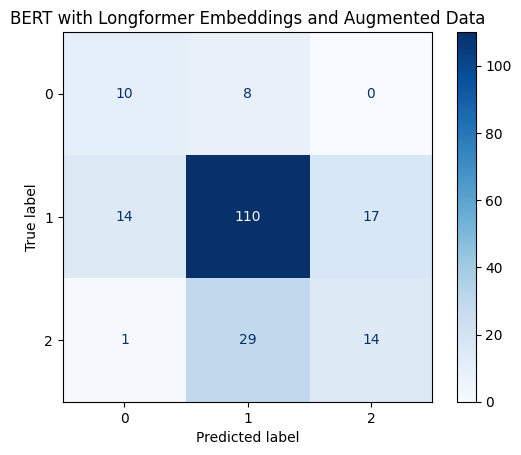

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import LongformerForSequenceClassification, Trainer

# Load the best model saved during Optuna hyperparameter tuning
best_model = LongformerForSequenceClassification.from_pretrained('/content/drive/MyDrive/MDS project/best_model')

# Initialize the Trainer with the loaded model (without any training arguments for prediction)
trainer = Trainer(
    model=best_model,
    compute_metrics=compute_metrics  # Optional, for getting metrics during evaluation
)

# Perform predictions on the test dataset
predictions = trainer.predict(text_encoded["test"])

# Get predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Get true labels
true_labels = text_encoded['test']['label']  # Assuming your test dataset has a 'labels' column

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("BERT with Longformer Embeddings and Augmented Data")
plt.show()

In [ ]:
report = classification_report(true_labels, predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2'])

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.40      0.56      0.47        18
     Class 1       0.75      0.78      0.76       141
     Class 2       0.45      0.32      0.37        44

    accuracy                           0.66       203
   macro avg       0.53      0.55      0.53       203
weighted avg       0.65      0.66      0.65       203



In [ ]:
from datasets import Dataset

short_data = [v for v in text_encoded["test"]["text"][:10]]

data_dict = {"text": short_data}

dataset = Dataset.from_dict(data_dict)

print(dataset)


Dataset({
    features: ['text'],
    num_rows: 10
})


In [ ]:
import shap
from transformers import pipeline

classifier = pipeline('text-classification', return_all_scores=True, model=best_model,tokenizer=tokenizer, device=0 )

classifier

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
explainer = shap.Explainer(classifier)

In [ ]:
shap_values = explainer(dataset["text"])

shap_values

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  30%|███       | 3/10 [01:25<02:21, 20.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 4/10 [02:06<02:55, 29.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 5/10 [02:47<02:47, 33.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  60%|██████    | 6/10 [03:25<02:20, 35.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  70%|███████   | 7/10 [04:01<01:45, 35.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 8/10 [04:43<01:15, 37.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  90%|█████████ | 9/10 [05:30<00:40, 40.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 10/10 [06:11<00:00, 40.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 11it [06:54, 41.42s/it]


.values =
array([array([[ 1.10233788e-04, -4.82034588e-05, -6.20302387e-05],
              [ 1.10233788e-04, -4.82034588e-05, -6.20302387e-05],
              [ 1.10233788e-04, -4.82034588e-05, -6.20302387e-05],
              ...,
              [-1.43143477e-04,  1.97797183e-04, -5.46534483e-05],
              [-1.43143477e-04,  1.97797183e-04, -5.46534483e-05],
              [-1.43143477e-04,  1.97797183e-04, -5.46534483e-05]]),
       array([[ 1.97508503e-04, -1.52558750e-04, -4.49497158e-05],
              [ 1.97508503e-04, -1.52558750e-04, -4.49497158e-05],
              [ 1.97508503e-04, -1.52558750e-04, -4.49497158e-05],
              ...,
              [-3.28956549e-03,  3.31736488e-03, -2.77995402e-05],
              [-3.28956549e-03,  3.31736488e-03, -2.77995402e-05],
              [-1.21668397e-03,  1.30626203e-03, -8.95781943e-05]]),
       array([[ 1.50558991e-05,  8.26370640e-04, -8.41426491e-04],
              [ 1.50558991e-05,  8.26370640e-04, -8.41426491e-04],
          

In [ ]:
custom_labels = ["Unclassified, 1-star and 2-star", "3-star", "4-star"]
shap_values.output_names = custom_labels

shap.plots.text(shap_values[8])

In [ ]:
text_encoded["test"]["label"][8]

1

In [ ]:
import numpy as np
import torch
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import Trainer, TrainingArguments, LongformerForSequenceClassification
from sklearn.model_selection import StratifiedKFold
import optuna
from datasets import concatenate_datasets

# Combine the validation and test datasets into a single test set
test_dataset = concatenate_datasets([dataset_dict['validation'], dataset_dict['test']])
train_dataset = dataset_dict['train']  # Keep the training set for K-fold cross-validation

from transformers import LongformerTokenizer

# Load the Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize the datasets
def tokenize_function(example):
    return tokenizer(
        example['text'],  # Replace 'text' with the actual column name of your text data
        padding="max_length",
        truncation=True,
        max_length=4096  # Longformer has a maximum sequence length of 4096
    )

# Apply tokenization to the train and test datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set the format of the datasets to include PyTorch tensors
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Define a function to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    # Calculate precision, recall, f1 using macro average
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='macro', zero_division=0
    )

    # Calculate accuracy
    acc = accuracy_score(labels, preds)

    # Return metrics as a dictionary
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Global variables to track best F1 score and model path
best_f1_macro = 0
best_model_path = '/new_model'  # Directory to save the best model

# Objective function for Optuna with cross-validation
def objective(trial):
    global best_f1_macro  # Use the global variable to track the best score

    model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=3)

    # Define the hyperparameters to tune
    per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
    learning_rate = trial.suggest_categorical('learning_rate', [2e-5, 3e-5, 5e-5])
    num_epochs = trial.suggest_categorical('num_epochs', [2, 3, 4])
    weight_decay = trial.suggest_uniform('weight_decay', 0, 0.3)
    warmup_steps = trial.suggest_int('warmup_steps', 0, 500)

    # Define the training arguments
    training_args = TrainingArguments(
        output_dir='./temp_results',  # Temporary directory for each trial
        num_train_epochs=num_epochs,
        per_device_train_batch_size=per_gpu_batch_size,
        evaluation_strategy="no",  # We will handle evaluation manually
        save_strategy="no",  # Disable auto-saving to avoid overwriting between trials
        fp16=True,
        gradient_accumulation_steps=4,
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        logging_dir='./temp_logs',
        logging_steps=10,
        report_to="none",
        warmup_steps=warmup_steps
    )

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    # Extract labels for cross-validation
    labels = train_dataset['label']  # Assuming 'label' is the column with the labels

    for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(labels)), labels)):
        print(f"Starting fold {fold+1}...")

        model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=3)

        # Create train and validation subsets for the current fold
        fold_train_dataset = train_dataset.select(train_idx)
        fold_val_dataset = train_dataset.select(val_idx)

        # Initialize the Trainer for this fold
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=fold_train_dataset,
            eval_dataset=fold_val_dataset,
            compute_metrics=compute_metrics
        )

        # Train the model
        trainer.train()

        # Evaluate the model
        eval_result = trainer.evaluate()

        # Calculate F1 macro score
        f1_macro = eval_result['eval_f1']
        f1_scores.append(f1_macro)

        # Check if this is the best model so far
        if f1_macro > best_f1_macro:
            print(f"New best model found with F1 macro: {f1_macro}. Saving model...")
            best_f1_macro = f1_macro
            # Save the best model to the specified directory
            trainer.save_model(best_model_path)

    # Return the average F1 macro score across folds for Optuna to optimize
    avg_f1_macro = np.mean(f1_scores)
    return avg_f1_macro

# Create a study object and optimize the objective function with cross-validation
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Increase the number of trials for a more thorough search

# Output the best hyperparameters found
print("Best hyperparameters found: ", study.best_params)

# Output the best trial's value
print("Best trial's F1 macro score: ", study.best_value)

# The best model is saved in `best_model_path` directory
print(f"The best model is saved at {best_model_path}")

# Final training with the best hyperparameters, then evaluate on the test set
def final_train_with_best_params():
    model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=3)

    # Get the best hyperparameters found by Optuna
    best_params = study.best_params
    per_gpu_batch_size = best_params['per_gpu_batch_size']
    learning_rate = best_params['learning_rate']
    num_epochs = best_params['num_epochs']
    weight_decay = best_params['weight_decay']
    warmup_steps = best_params['warmup_steps']

    # Define training arguments for final training
    training_args = TrainingArguments(
        output_dir='/content/drive/MyDrive/path_to_save/new_model',  # Directory to save the final model
        num_train_epochs=num_epochs,
        per_device_train_batch_size=per_gpu_batch_size,
        evaluation_strategy="epoch",
        save_strategy="epoch",  # Save model at the end of each epoch
        fp16=True,
        gradient_accumulation_steps=4,
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        logging_dir='./final_logs',
        logging_steps=10,
        report_to="none",
        warmup_steps=warmup_steps,
        save_total_limit=2,
        load_best_model_at_end=True  # Load the best model at the end of training
    )

    # Train on the full train dataset (use all training data)
    final_trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,  # Train on the full training dataset
        compute_metrics=compute_metrics
    )

    # Train the final model
    final_trainer.train()

    # Save the final model to the specified path
    final_trainer.save_model('/content/drive/MyDrive/path_to_save/new_model')

    # Evaluate the final model on the combined test dataset
    final_test_result = final_trainer.evaluate(test_dataset)
    print("Final evaluation on the test dataset:", final_test_result)

# Train the final model with best hyperparameters and evaluate on test dataset
final_train_with_best_params()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/1395 [00:00<?, ? examples/s]

Map:   0%|          | 0/405 [00:00<?, ? examples/s]

[I 2024-09-09 03:09:18,142] A new study created in memory with name: no-name-3cbd567f-b3d7-4581-a244-8f59b4582dc1
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] and step=6, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(
<ipython-input-27-b7bcb87cd5c0>:70: FutureWarning: 

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.119400
20,1.073700
30,1.092600
40,1.076100
50,1.066300
60,1.048200
70,0.993500
80,0.871700
90,0.994700
100,1.048300


New best model found with F1 macro: 0.7657232704402516. Saving model...
Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.057800
20,1.092500
30,1.092600
40,1.062400
50,1.062400
60,0.994800
70,1.017600
80,0.996500
90,0.965700
100,0.855100


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.070700
20,1.070300
30,1.072100
40,1.047000
50,1.049200
60,1.071700
70,1.003900
80,1.030600
90,0.939900
100,0.942900


New best model found with F1 macro: 0.7904509584098235. Saving model...
Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.096000
20,1.066600
30,1.096100
40,1.041700
50,1.025000
60,1.051300
70,0.943200
80,0.915500
90,0.936700
100,0.911100


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.081400
20,1.040200
30,1.073700
40,1.030100
50,1.074200
60,1.022000
70,1.050400
80,1.068600
90,0.966800
100,0.850200


[I 2024-09-09 04:21:59,211] Trial 0 finished with value: 0.7660113842131953 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 4, 'weight_decay': 0.15720037988961735, 'warmup_steps': 223}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] a

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.103300
20,1.058000
30,1.077000
40,1.076000
50,1.059000
60,1.067300
70,1.007200
80,0.886700
90,0.938600
100,0.892400


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.057800
20,1.092600
30,1.092800
40,1.063200
50,1.063900
60,0.992200
70,1.021100
80,0.974300
90,0.959100
100,0.839900


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.070800
20,1.070400
30,1.072300
40,1.047700
50,1.048900
60,1.072100
70,0.991100
80,1.008500
90,0.929000
100,0.950500


New best model found with F1 macro: 0.7906694997390592. Saving model...
Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.096100
20,1.066700
30,1.096400
40,1.043100
50,1.028000
60,1.056200
70,0.956800
80,0.936900
90,0.951200
100,0.930200


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.081400
20,1.040300
30,1.074200
40,1.030700
50,1.074500
60,1.025100
70,1.057900
80,1.078300
90,0.994000
100,0.899600


[I 2024-09-09 05:34:36,460] Trial 1 finished with value: 0.7620159386541585 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.2887311285641776, 'warmup_steps': 393}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] an

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.104600
20,1.046200
30,1.048600
40,1.023900
50,0.901800
60,0.817900
70,0.897200
80,0.680800
90,0.854900
100,0.904600


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.082800
20,1.086300
30,1.071200
40,0.986900
50,0.903000
60,0.781800
70,0.782000
80,0.792400
90,0.829100
100,0.763600


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.074900
20,1.077100
30,1.043800
40,0.950400
50,0.952700
60,0.943000
70,0.760900
80,0.762900
90,0.834400
100,0.919400


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.091000
20,1.055000
30,1.088000
40,0.974500
50,0.843200
60,0.822900
70,0.760600
80,0.763300
90,0.869300
100,0.876800


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.079700
20,1.072300
30,1.034800
40,0.957400
50,1.038700
60,0.882800
70,0.854000
80,0.950600
90,0.863500
100,0.834100


[I 2024-09-09 06:29:27,475] Trial 2 finished with value: 0.7402371440623623 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 3, 'weight_decay': 0.18137745274094225, 'warmup_steps': 33}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] an

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.107100
20,1.083200
30,1.092600
40,1.081400
50,1.074400
60,1.092200
70,1.055200
80,1.010600
90,1.064100
100,1.026400


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.057900
20,1.092800
30,1.094600
40,1.064200
50,1.078100
60,1.022500
70,1.053500
80,1.038300
90,1.052500
100,1.029600


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.070900
20,1.070800
30,1.075100
40,1.059000
50,1.061000
60,1.081000
70,1.035900
80,1.081200
90,1.052200
100,1.044600


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.096100
20,1.067700
30,1.096000
40,1.052100
50,1.042400
60,1.070600
70,1.015600
80,1.023200
90,1.084600
100,1.067600


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.081500
20,1.042400
30,1.079800
40,1.042900
50,1.078800
60,1.048600
70,1.076000
80,1.091100
90,1.062000
100,1.078200


[I 2024-09-09 07:41:57,081] Trial 3 finished with value: 0.7398910019773732 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 4, 'weight_decay': 0.0032012362123413074, 'warmup_steps': 414}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4]

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.103200
20,1.058300
30,1.078200
40,1.077600
50,1.063200
60,1.072300
70,1.020900
80,0.934300
90,0.983800
100,0.898000


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.057800
20,1.092700
30,1.093300
40,1.062400
50,1.068400
60,1.003600
70,1.032900
80,0.996400
90,0.997300
100,0.891900


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.070800
20,1.070600
30,1.073100
40,1.050500
50,1.051700
60,1.072600
70,1.003000
80,1.022100
90,0.954600
100,0.965600


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.096100
20,1.067100
30,1.096100
40,1.045000
50,1.029600
60,1.057800
70,0.968500
80,0.964900
90,1.014200
100,0.978600


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.081500
20,1.040700
30,1.075100
40,1.033200
50,1.076200
60,1.030300
70,1.060500
80,1.080500
90,1.012900
100,0.962000


[I 2024-09-09 08:54:23,282] Trial 4 finished with value: 0.7603112042584579 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 4, 'weight_decay': 0.2475301554340311, 'warmup_steps': 278}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] an

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.103300
20,1.058100
30,1.077200
40,1.076500
50,1.060200
60,1.069400
70,1.006900
80,0.888700
90,0.954600
100,0.893200


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.057800
20,1.092600
30,1.092900
40,1.063400
50,1.065700
60,0.995700
70,1.022400
80,0.974100
90,0.959400
100,0.844800


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.070800
20,1.070400
30,1.072500
40,1.048300
50,1.049500
60,1.071900
70,0.997800
80,1.016500
90,0.954600
100,0.962400


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.096100
20,1.066700
30,1.096100
40,1.042900
50,1.026900
60,1.056500
70,0.963200
80,0.947000
90,0.966000
100,0.930900


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.081400
20,1.040400
30,1.074400
40,1.031100
50,1.074900
60,1.025400
70,1.055400
80,1.074900
90,0.988100
100,0.893300


[I 2024-09-09 10:06:53,355] Trial 5 finished with value: 0.7641081422035486 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 4, 'weight_decay': 0.07487193349076561, 'warmup_steps': 404}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] a

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.103100
20,1.058900
30,1.081200
40,1.080400
50,1.068100
60,1.080600
70,1.039000
80,0.991100
90,1.055500
100,1.033000


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.068300
20,1.099700
30,1.098000
40,1.079600
50,1.062300
60,1.015400
70,1.053000
80,1.051800
90,1.041000
100,0.985900


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.101300
20,1.058000
30,1.087000
40,1.055800
50,1.031200
60,1.073600
70,1.050100
80,1.067800
90,1.049700
100,1.025800


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.094200
20,1.064700
30,1.100500
40,1.069900
50,1.064300
60,1.050500
70,1.005400
80,1.006700
90,1.072700
100,1.044500


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.123100
20,1.020400
30,1.062800
40,1.042300
50,1.096000
60,1.018400
70,1.089400
80,1.082500
90,1.049200
100,1.066300


[I 2024-09-09 10:43:47,599] Trial 6 finished with value: 0.6348294195497812 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.22609269400583562, 'warmup_steps': 476}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] a

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.121800
20,1.138100
30,1.119400
40,1.108100
50,1.103300
60,1.092200
70,1.068800
80,1.042800
90,1.074200
100,1.068800


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.068300
20,1.099700
30,1.098100
40,1.079800
50,1.061100
60,1.014000
70,1.052900
80,1.058700
90,1.048900
100,0.990100


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.101300
20,1.058100
30,1.087100
40,1.056000
50,1.031100
60,1.073600
70,1.049000
80,1.066500
90,1.050100
100,1.026500


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.094200
20,1.064600
30,1.100500
40,1.069900
50,1.064300
60,1.050300
70,1.005200
80,1.007700
90,1.070000
100,1.044200


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.123100
20,1.020400
30,1.062800
40,1.042300
50,1.096000
60,1.018300
70,1.090000
80,1.083400
90,1.050100
100,1.067300


[I 2024-09-09 11:20:36,504] Trial 7 finished with value: 0.6135535923100159 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 2e-05, 'num_epochs': 2, 'weight_decay': 0.2512293166997013, 'warmup_steps': 321}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] an

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.121700
20,1.137000
30,1.115200
40,1.101700
50,1.093900
60,1.080900
70,1.052300
80,1.013900
90,1.072700
100,1.059900


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.068200
20,1.099600
30,1.097800
40,1.076100
50,1.056700
60,1.001000
70,1.038200
80,1.024200
90,1.004900
100,0.907300


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.101300
20,1.057700
30,1.085900
40,1.051800
50,1.027900
60,1.072100
70,1.037700
80,1.054500
90,1.027400
100,0.999400


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.094200
20,1.064400
30,1.100400
40,1.066200
50,1.059700
60,1.045900
70,0.989500
80,0.989000
90,1.056400
100,1.037800


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.123100
20,1.020300
30,1.061500
40,1.037900
50,1.093300
60,1.011500
70,1.080600
80,1.072900
90,1.026300
100,1.017200


[I 2024-09-09 11:57:27,214] Trial 8 finished with value: 0.6859695783075873 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 2, 'weight_decay': 0.241080018259563, 'warmup_steps': 333}. Best is trial 0 with value: 0.7660113842131953.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-27-b7bcb87cd5c0>:67: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  per_gpu_batch_size = trial.suggest_int('per_gpu_batch_size', 2, 4, 6)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:704: UserWarning: The distribution is specified by [2, 4] and

Starting fold 1...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.121800
20,1.034100
30,1.054000
40,0.958300
50,1.112100
60,1.074100
70,0.941900
80,0.779300
90,0.931400
100,1.021100


Starting fold 2...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.060700
20,1.062600
30,0.980200
40,0.955500
50,0.838100
60,0.756000
70,0.775000
80,0.766800
90,0.816900
100,0.788200


Starting fold 3...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.074800
20,1.007300
30,0.897500
40,0.770400
50,0.918600
60,0.935500
70,0.759900
80,0.795800
90,0.822900
100,0.900500


Starting fold 4...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.077800
20,0.963900
30,0.957200
40,0.919500
50,0.859000
60,0.789500
70,0.753000
80,0.784700
90,0.856900
100,0.886800


Starting fold 5...


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,1.078900
20,0.978900
30,0.901900
40,0.797800
50,1.005800
60,0.750000
70,0.869600
80,0.954100
90,0.862000
100,0.840400


[I 2024-09-09 12:52:08,085] Trial 9 finished with value: 0.682666698800389 and parameters: {'per_gpu_batch_size': 2, 'learning_rate': 5e-05, 'num_epochs': 3, 'weight_decay': 0.0925010090200808, 'warmup_steps': 15}. Best is trial 0 with value: 0.7660113842131953.


Best hyperparameters found:  {'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 4, 'weight_decay': 0.15720037988961735, 'warmup_steps': 223}
Best trial's F1 macro score:  0.7660113842131953
The best model is saved at /content/drive/MyDrive/path_to_save/new_model


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss


ValueError: Trainer: evaluation requires an eval_dataset.

In [ ]:
best_params = study.best_params

per_gpu_batch_size = best_params['per_gpu_batch_size']
learning_rate = best_params['learning_rate']
num_epochs = best_params['num_epochs']
weight_decay = best_params['weight_decay']
warmup_steps = best_params['warmup_steps']

print(best_params)


{'per_gpu_batch_size': 2, 'learning_rate': 3e-05, 'num_epochs': 4, 'weight_decay': 0.15720037988961735, 'warmup_steps': 223}
